<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%209/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-20 19:51:40.342801


In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/s8'
sys.path.append(folder)

In [0]:
%matplotlib inline
import torch

In [0]:
import data_loading

In [0]:
import show_images

In [0]:
import dnn_architecture

In [0]:
import train_and_test

In [0]:
import evaluate

In [10]:
classes, trainloader, testloader = data_loading.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat


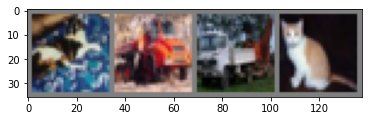

In [11]:
show_images.show_random_images(trainloader, classes)

In [12]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = dnn_architecture.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = MultiStepLR(optimizer, milestones=[10,13,15], gamma=0.1)

In [14]:

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
    train_and_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    train_and_test.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.0061073303222656 Batch_id=390 Accuracy=53.23: 100%|██████████| 391/391 [00:13<00:00, 29.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6100/10000 (61.00%)

EPOCH: 2 LR: 0.1


Loss=0.8040311932563782 Batch_id=390 Accuracy=69.74: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6757/10000 (67.57%)

EPOCH: 3 LR: 0.1


Loss=0.5166759490966797 Batch_id=390 Accuracy=76.30: 100%|██████████| 391/391 [00:13<00:00, 29.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7346/10000 (73.46%)

EPOCH: 4 LR: 0.1


Loss=0.761339008808136 Batch_id=390 Accuracy=79.74: 100%|██████████| 391/391 [00:13<00:00, 29.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7696/10000 (76.96%)

EPOCH: 5 LR: 0.1


Loss=0.5748344659805298 Batch_id=390 Accuracy=81.71: 100%|██████████| 391/391 [00:13<00:00, 29.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7510/10000 (75.10%)

EPOCH: 6 LR: 0.1


Loss=0.5027843713760376 Batch_id=390 Accuracy=82.76: 100%|██████████| 391/391 [00:13<00:00, 29.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7556/10000 (75.56%)

EPOCH: 7 LR: 0.1


Loss=0.5334455370903015 Batch_id=390 Accuracy=83.71: 100%|██████████| 391/391 [00:13<00:00, 29.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7963/10000 (79.63%)

EPOCH: 8 LR: 0.1


Loss=0.39159005880355835 Batch_id=390 Accuracy=84.48: 100%|██████████| 391/391 [00:13<00:00, 29.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7880/10000 (78.80%)

EPOCH: 9 LR: 0.1


Loss=0.3921915888786316 Batch_id=390 Accuracy=85.05: 100%|██████████| 391/391 [00:13<00:00, 29.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7654/10000 (76.54%)

EPOCH: 10 LR: 0.1


Loss=0.3137351870536804 Batch_id=390 Accuracy=85.10: 100%|██████████| 391/391 [00:13<00:00, 29.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7976/10000 (79.76%)

EPOCH: 11 LR: 0.010000000000000002


Loss=0.2505452334880829 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [00:13<00:00, 29.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8648/10000 (86.48%)

EPOCH: 12 LR: 0.010000000000000002


Loss=0.20779569447040558 Batch_id=390 Accuracy=93.09: 100%|██████████| 391/391 [00:13<00:00, 29.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8654/10000 (86.54%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.1641935557126999 Batch_id=390 Accuracy=94.22: 100%|██████████| 391/391 [00:13<00:00, 29.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8659/10000 (86.59%)

EPOCH: 14 LR: 0.0010000000000000002


Loss=0.15328288078308105 Batch_id=390 Accuracy=95.27: 100%|██████████| 391/391 [00:13<00:00, 29.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8682/10000 (86.82%)

EPOCH: 15 LR: 0.0010000000000000002


Loss=0.20855684578418732 Batch_id=390 Accuracy=95.60: 100%|██████████| 391/391 [00:13<00:00, 29.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8661/10000 (86.61%)

EPOCH: 16 LR: 0.00010000000000000003


Loss=0.13026578724384308 Batch_id=390 Accuracy=95.72: 100%|██████████| 391/391 [00:13<00:00, 29.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8672/10000 (86.72%)

EPOCH: 17 LR: 0.00010000000000000003


Loss=0.16114194691181183 Batch_id=390 Accuracy=95.78: 100%|██████████| 391/391 [00:13<00:00, 29.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8685/10000 (86.85%)

EPOCH: 18 LR: 0.00010000000000000003


Loss=0.07043872028589249 Batch_id=390 Accuracy=95.79: 100%|██████████| 391/391 [00:13<00:00, 28.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8676/10000 (86.76%)

EPOCH: 19 LR: 0.00010000000000000003


Loss=0.23452751338481903 Batch_id=390 Accuracy=95.88: 100%|██████████| 391/391 [00:13<00:00, 29.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8685/10000 (86.85%)

EPOCH: 20 LR: 0.00010000000000000003


Loss=0.17825323343276978 Batch_id=390 Accuracy=95.81: 100%|██████████| 391/391 [00:13<00:00, 29.07it/s]



Test set: Average loss: 0.0032, Accuracy: 8684/10000 (86.84%)



Text(0.5, 1.0, 'Test Accuracy')

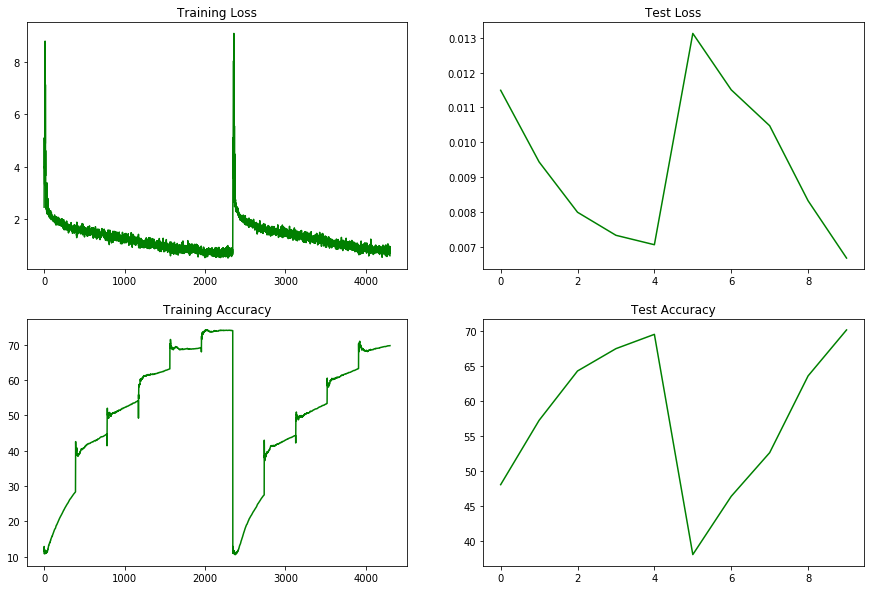

In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_and_test1.train_losses,color = 'g')
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_and_test1.train_acc,color = 'g')
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_and_test1.test_losses,color = 'g')
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_and_test1.test_acc,color = 'g')
axs[1, 1].set_title("Test Accuracy")

In [0]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [0]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 87 %


In [0]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 88 %
Accuracy of   cat : 72 %
Accuracy of  deer : 78 %
Accuracy of   dog : 71 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %
